Output setelah pelatihan:
[[0.04344263]
 [0.85988844]
 [0.85988671]
 [0.55144818]]


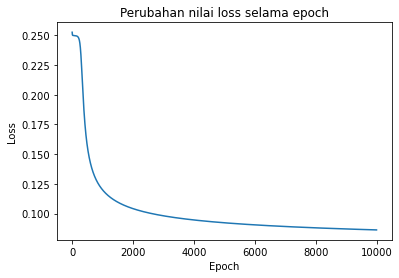

Output prediksi:
[[0.]
 [1.]
 [1.]
 [1.]]


In [1]:
#Aldyn Aditya Majid Arrasyid
#21060120110045

import numpy as np
import matplotlib.pyplot as plt

#fungsi aktivasi(sigmoid)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

#turunan fungsi sigmoid
def sigmoid_derivative(x):
    return x * (1 - x)

#forward propagation
def forward_propagation(X, weights_0, weights_1):
    layer_0 = X
    layer_1 = sigmoid(np.dot(layer_0, weights_0))
    layer_2 = sigmoid(np.dot(layer_1, weights_1))
    return layer_0, layer_1, layer_2

#backward propagation
def backward_propagation(X, y, layer_0, layer_1, layer_2, weights_0, weights_1):
    layer_2_error = y - layer_2
    layer_2_delta = layer_2_error * sigmoid_derivative(layer_2)

    layer_1_error = layer_2_delta.dot(weights_1.T)
    layer_1_delta = layer_1_error * sigmoid_derivative(layer_1)

    weights_1 += layer_1.T.dot(layer_2_delta)
    weights_0 += layer_0.T.dot(layer_1_delta)
    return weights_0, weights_1

#XOR Input dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

#XOR Output dataset
y = np.array([[0], [1], [1], [0]])

#mengatur angka acak untuk untuk hasil yang konsisten
np.random.seed(2)

#menginisialisasi bobot secara acak dengan rata-rata 0
weights_0 = 2 * np.random.random((2, 2)) - 1
weights_1 = 2 * np.random.random((2, 1)) - 1

#list nilai loss dan epoch
losses = []
epochs = []

for i in range(10000):
    #forward propagation
    layer_0, layer_1, layer_2 = forward_propagation(X, weights_0, weights_1)
    #menghitung loss
    loss = np.mean(np.square(y - layer_2))
    losses.append(loss)
    epochs.append(i)

    #backward propagation
    weights_0, weights_1 = backward_propagation(X, y, layer_0, layer_1, layer_2, weights_0, weights_1)

test_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
output = forward_propagation(test_data, weights_0, weights_1)[2]
print("Output setelah pelatihan:")
print(output)

plt.plot(epochs, losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Perubahan nilai loss selama epoch')
plt.show()

prediction = np.round(output)
print("Output prediksi:")
print(prediction)
